ATIVIDADE 4: Classificador

Utilize a mesma base da atividade de KNN
Procure realizar a previsão (inferência) de uma variável categórica através de uma Árvore de Decisão e de uma Rede Neural . Se certifique de medir seus níveis de assertividade. Compare o resultado com sua atividade do kNN. Não esqueça de realizar a interpretação das regras de negócio da árvore.
Não esqueça de junto com seus códigos realizar suas análises/conclusões (use o botão de +Texto).

Banco de dados usado: https://www.kaggle.com/datasets/uciml/iris

In [83]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from graphviz import Source
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import seaborn as sns
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.preprocessing import LabelEncoder
import numpy as np

In [84]:
df = pd.read_csv('/content/Iris.csv')

In [85]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [86]:
df.shape

(150, 6)

In [87]:
df.Species.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

#Árvore de Decisão

In [88]:
df_X = df.drop(['Id', 'Species'], axis=1)
df_y = df['Species']

In [89]:
X_treino, X_teste, y_treino, y_teste = train_test_split(df_X, df_y, test_size=0.20, random_state= 20)

In [90]:
arvore = DecisionTreeClassifier(max_depth=5)
arvore.fit(X_treino, y_treino)

DecisionTreeClassifier(max_depth=5)

In [91]:
acc_treino = arvore.score(X_treino, y_treino)
print('Acuracia Treino:',acc_treino*100)

Acuracia Treino: 100.0


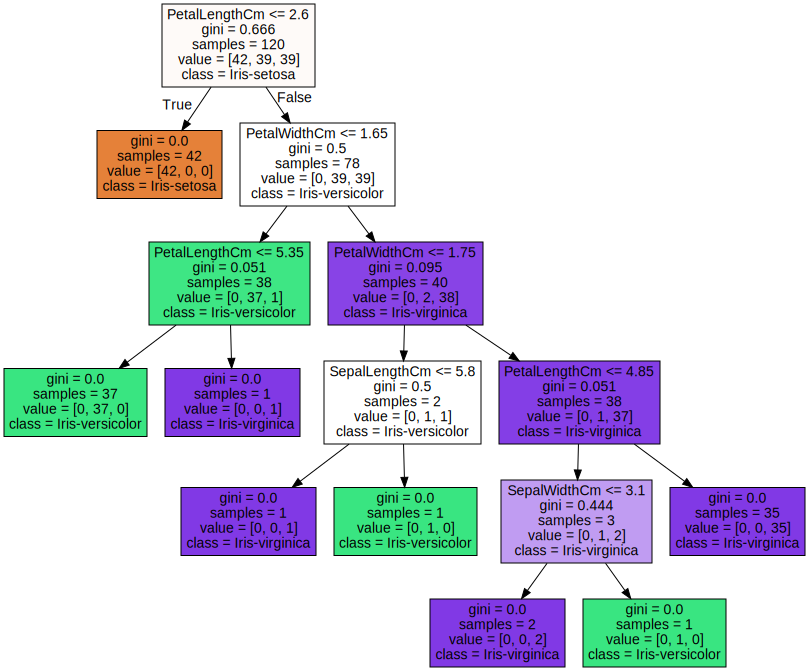

In [92]:
Source(export_graphviz(arvore, filled = True, feature_names=['SepalLengthCm',  'SepalWidthCm',  'PetalLengthCm', 'PetalWidthCm'], class_names=['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']))

In [93]:
prev_teste = arvore.predict(X_teste)

In [94]:
acc_teste = accuracy_score(y_teste, prev_teste)
print('Acuracia Teste', acc_teste*100)

Acuracia Teste 93.33333333333333


[[ 8  0  0]
 [ 0 11  0]
 [ 0  2  9]]


<Axes: >

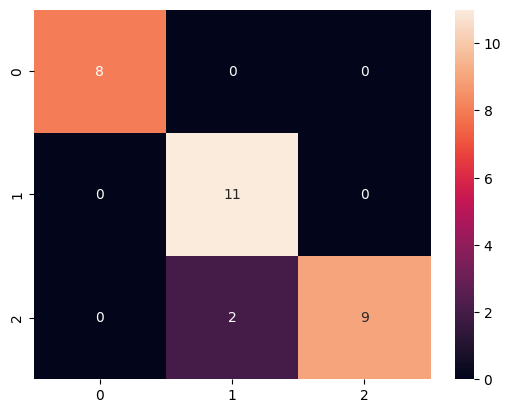

In [95]:
cm = confusion_matrix(y_teste,prev_teste)
print(cm)
sns.heatmap(cm,fmt='d',annot=True)

In [96]:
print(classification_report(y_teste,prev_teste))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         8
Iris-versicolor       0.85      1.00      0.92        11
 Iris-virginica       1.00      0.82      0.90        11

       accuracy                           0.93        30
      macro avg       0.95      0.94      0.94        30
   weighted avg       0.94      0.93      0.93        30



#Rede Neural

In [97]:
nn = keras.Sequential([
    keras.layers.Input((4,)),
    keras.layers.Dense(3, activation='relu'),
    keras.layers.Dense(2, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

nn.compile(optimizer='adam', loss='binary_crossentropy')

In [98]:
le = LabelEncoder()
y_treino = le.fit_transform(y_treino)

le = LabelEncoder()
y_teste = le.fit_transform(y_teste)

In [99]:
nn.fit(X_treino, y_treino)

4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.6928


In [100]:
prev_teste = nn.predict(X_teste)
prev_teste = np.argmax(prev_teste, axis=1)

acc_teste = accuracy_score(y_teste, prev_teste)
print('Acuracia Teste', acc_teste*100)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
Acuracia Teste 26.666666666666668


In [101]:
prev_treino = nn.predict(X_treino)
prev_treino = np.argmax(prev_treino, axis=1)

acc_teste = accuracy_score(y_treino, prev_treino)
print('Acuracia Treino', acc_teste*100)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step  
Acuracia Treino 35.0


#Conclusões

O modelo de árvore de decisão iniciou a divisão dos grupos pela featuring "PetalWidthCm", passando por todas as demais featurings para definir a espécie correta das Iris (flores). Utilizando como regra os tamanhos e proporções das petalas.

Após avaliar as performances dos modelos, identificamos que a assertividade da árvore de decisão e KNN foram similares. A única diferença encontrada é referente a ácuracia de treino, que usando árvore de decisões foi levemente maior. Isso ocorre pois o conjunto de dados não é grande e pouco complexo. Dessa forma KNN se mostra suficiente para realizar boas previsões

E por essa característica da base ser simples e pequena, o modelo de rede neural acaba mostrando-se pouco ou quase nada efetivo. Com ácuracia menor de 40%.